## Préparation
Il existe de nombreuses bibliothèques Python permettant la manipulation d’images.  

Nous allons dans un premier temps explorer ici la solution **`pillow`** qui est la version Python3 du très célèbre module **`PIL`** (Python Image Library).

Pour pouvoir utiliser les fonctionnalités d'une bibliothèque, il faut au préalable l'importer dans le notebook jupyter actif, par exemple, tester la commande :

In [23]:
import PIL

S’il ne se passe rien c’est bon signe, c’est que votre environnement Python connaît cette bibliothèque.  
Dans le cas contraire vous obtenez un message d’erreur, il faut alors installer la bibliothèque manquante à partir d'un terminal de commande...

## Précaution
Avant de (mal) traiter une image, il est bon de s'assurer d'être autorisé à le faire.

Ainsi, l'image utilisée dans ce Bloc-Note résulte d'une recherche sur le métamoteur [CC search](https://search.creativecommons.org/). 
<img src="img/mesange.jpg" alt="mesange image" title="Une jeune mésange bleu" width="50%">

Elle est sous licence *CC0 Creative Commons (Free for commercial use, No attribution required)* et est disponible au téléchargement sur la page : https://pixabay.com/en/bird-tit-blue-tit-young-2396015/

## Premiers pas avec `pillow` :

In [2]:
from PIL import Image
img = Image.open("img/mesange.jpg")

L'objet retourné, img peut être interrogé afin d'obtenir les informations de taille, format, et mode :

In [3]:
print(img.size, img.format, img.mode)

(640, 426) JPEG RGB


On peut connaître la valeur d'un pixel (0,0) (ici le coin supérieur gauche) ainsi :

In [8]:
img.getpixel((0,0))

(39, 72, 1)

Ce résultat est de type `tuple`

In [9]:
type(img.getpixel((0,0)))

tuple

On peut donc ne récupérer qu'une seule composante de couleur, comme par exemple ici le vert :

In [6]:
img.getpixel((0,0))[1]

72

Un pixel de l'image (RGB) peut être modifié en donnant ses coordonnées et ses nouvelles composantes.

In [41]:
img.putpixel((0,0),(255,0,0))

On vérifie alors la modification :

In [42]:
img.getpixel((0,0))

(255, 0, 0)

In [ ]:
img

Aussi, pour agir sur une zone plus importante de notre image nous pouvons avantageusement utiliser des boucles imbriquées tel que par exemple :

In [70]:
for i in range (100,250) :
    for j in range (100,200):
        img.putpixel((i,j),(255,255,255))

 Le résultat de la modification peut alors être visualisée très simplement avec jupyter notebook :

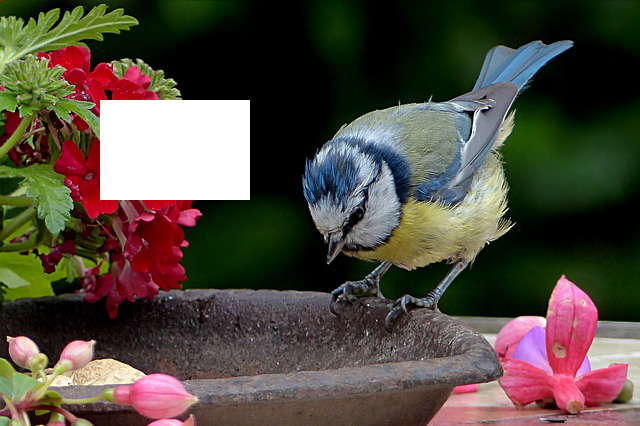

In [48]:
img

La modification peut aussi, mais uniquement avec jupyter sur une machine locale, être visualisée dans l'application d'affichage d'image par défaut avec la fonction `show()`:

In [44]:
img.show()

Puis on peut sauvegarder l'image résultante :

In [45]:
img.save("imgV0.png")

Un nouveau fichier image a été créé à la racine du répertoire contenant ce bloc note.  Attention : si un fichier du même nom existait déjà, il sera tout simplement écrasé et remplacé par le nouveau.

L'environnement de jupyter offre alors de très nombreuses solutions pour voir les modifications que nous avons apportées à notre image :
* Pour la visualiser dans le navigateur, il suffit de double cliquer sur le fichier créé dans le répertoire de ce notebook via le dashboard. L'image s'affiche alors dans un nouvel onglet du navigateur.
![fichier image](img/fichierImage.png "Image fichier image créé")

* Pour l'insérer dans notre Bloc Note, on peut utiliser le Mardown ou l'HTML

![image traitée](imgV0.png "Image après traitement")

<img src="imgV0.png" alt="image traitée" title="Image après traitement" width="65%">

* on peut aussi faire appel au `display` de `Ipython`

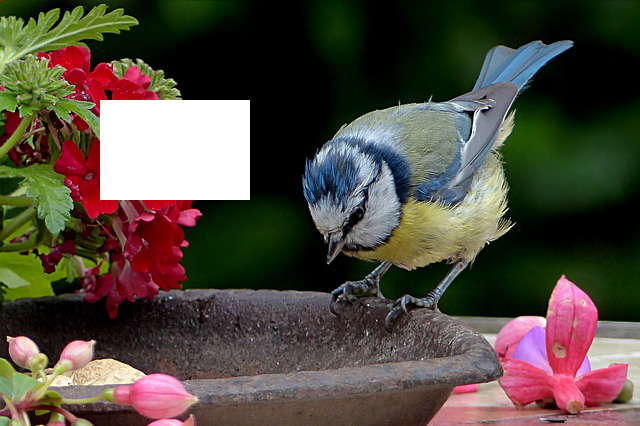

In [49]:
from IPython.display import Image
Image("imgV0.png")


* On peut même faire appel à `matplotlib` :

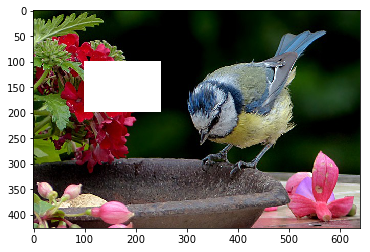

In [46]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

## Plus avant avec `Pillow`



### Créer une image à partir de rien
La commande suivante crée une image de taille 400×300, contenant 3 plans de couleurs, et initialement entièrement grise :

In [1]:
from PIL import Image
monImage=Image.new("RGB",(400,300),"grey")

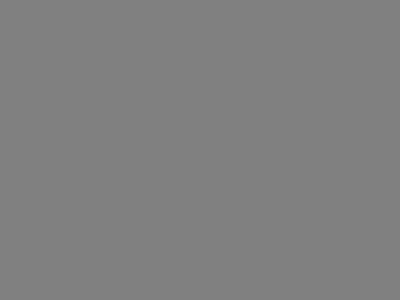

In [80]:
monImage

### Fonctions de dessin avancées
Il est possible de dessiner sur une image. Pour cela, on commence par obtenir une instance de ImageDraw:

In [73]:
from PIL import ImageDraw
imgdr = ImageDraw.Draw(img)

Puis on dessine sur ce nouvel objet :

In [74]:
imgdr.line([(250,200),(300,250)], (0,255,255), width=10)

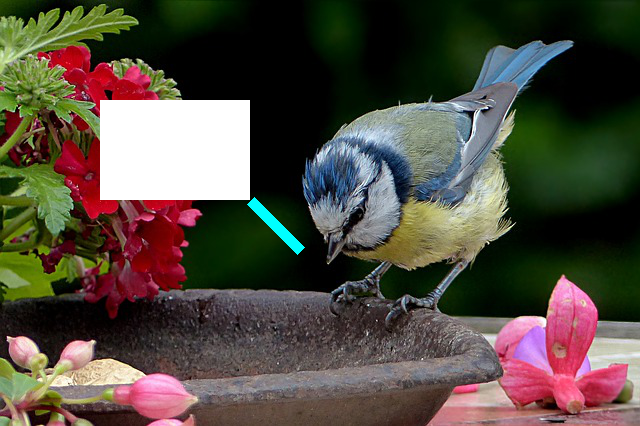

In [76]:
img

> Ajouter un cadre autour du rectangle blanc avec un texte dedans

## Besoin d'aide :

Le module phare de traitement de l'image en Python, PIL (Python Image Library) n'a pas tout de suite été porté en Python 3. Comme c'est souvent le cas dans le monde du libre, un fork pour Python 3 est apparu : Pillow. Pillow et PIL s'utilisent donc pratiquement de la même façon.

La documentation complète de Pillow est accessible ici : https://pillow.readthedocs.io

D'autres informations peuvent être trouvées dans la documentation de PIL : http://effbot.org/imagingbook/

et sur ce site : http://jlbicquelet.free.fr/scripts/python/pil/pil.php#manipulation2

L'autocomplétion présente toutes les méthodes de l'objet instancié en appuyant sur la touche **`Tab`** après le point : 

In [ ]:
img.

On peut également appeler la documentation pour obtenir la liste des fonctions disponibles :

In [3]:
help(img)

Help on JpegImageFile in module PIL.JpegImagePlugin object:

class JpegImageFile(PIL.ImageFile.ImageFile)
 |  Base class for image file format handlers.
 |  
 |  Method resolution order:
 |      JpegImageFile
 |      PIL.ImageFile.ImageFile
 |      PIL.Image.Image
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  draft(self, mode, size)
 |      Set draft mode
 |  
 |  load_djpeg(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  format = 'JPEG'
 |  
 |  format_description = 'JPEG (ISO 10918)'
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from PIL.ImageFile.ImageFile:
 |  
 |  __init__(self, fp=None, filename=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  load(self)
 |      Load image data based on tile list
 |  
 |  load_end(self)
 |  
 |  load_prepare(self)
 |  
 |  verify(self)
 |      Chec

## Ressources :

https://deptinfo-ensip.univ-poitiers.fr/ENS/doku/doku.php/stu:python_gui:tuto_images
http://fsincere.free.fr/isn/python/cours_python_ch10.php
http://dept-info.labri.fr/~namyst/ens/lycee/TD1.html
http://dept-info.labri.fr/~namyst/ens/lycee/TD2.html

### Documentation
* https://pypi.python.org/pypi/imageio
* http://imageio.readthedocs.io/en/latest/examples.html